<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista3_Exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O código abaixo gera um dataset com 40 séries de treinamento e 16 séries de teste e o salva em um arquivo .h5. Esse dataset é composto por 4 polinômios diferentes (t^0; t^1; t^2; t^3) mais ruido gaussiano.

(224, 30)


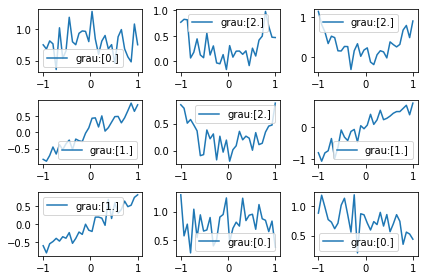

In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

#gera o data set com as funções t^0; t^1; t^2; t^3
N_class=4
s_p=30                                                                           #quantos pontos os dados de entrada tem
s_d=N_class*10                                                                   #quantos exemplos tem meu Dtrain
s_t=N_class*4                                                                    #quantos exemplos para teste
p_r = 0.2                                                                        #porcentagem de ruido 
t=np.linspace(-1,1,s_p)                                                          #define a escala de tempo

#dados de treinamento e teste
xtudo = np.empty((0,s_p),float)                                                  #inicializa as entradas
ytudo = np.empty((0,1),float)
for q_pol in range(0,N_class):
  matriz_polinomios=(1-p_r)*(np.ones([s_d+s_t,1])*t**q_pol)                      #cria os vetores
  matriz_pol_com_ruido=matriz_polinomios+p_r*np.random.normal(0,1,[s_d+s_t,s_p])
  xtudo = np.append(xtudo, matriz_pol_com_ruido, axis=0)
  matriz_graus = np.ones([s_d+s_t,1])*q_pol
  ytudo = np.append(ytudo, matriz_graus,axis=0)
tudo = np.append(xtudo, ytudo, axis=1)
tudo_misturado=tf.random.shuffle(tudo, seed=None, name=None)
lista_tudo_misturado=np.split(tudo_misturado, [s_p,s_p+1], axis=1)
xdata=lista_tudo_misturado[0]
ydata=lista_tudo_misturado[1]
print(xtudo.shape)

#mostra alguns dados
plt.figure()
for nn in range (0,9):
  plt.subplot(3,3,nn+1)
  plt.plot(t,xdata[nn,:])
  plt.legend(['grau:'+str(ydata[nn])])
plt.tight_layout()

#salva o dataset
with h5py.File('poli_data_set.h5','w') as hf:
   hf.create_dataset("tempo", data=t)
   hf.create_dataset("xdata", data=xdata)
   hf.create_dataset("ydata", data=ydata)
   hf.create_dataset("data_info", data=[s_p,s_d,s_t,N_class])

a) Crie e treine uma rede neural para classificação multi-classe para identificar esses polinômios para p_r=0,2.

dados do arquivo: ['data_info', 'tempo', 'xdata', 'ydata']
Model: "Rede_MultiClasse"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 12)                372       
                                                                 
 dense_103 (Dense)           (None, 4)                 52        
                                                                 
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________
None
shape xtrain= (30, 30)
shape ytrain= (30, 1)


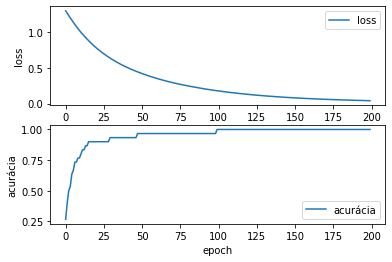

1/1 - 0s - loss: 0.2677 - accuracy: 0.9000 - 112ms/epoch - 112ms/step
Accuracy: 90.00
[[9.5575385e-02 1.0817950e-02 8.7447500e-01 1.9131651e-02]
 [9.8603755e-01 1.0794477e-03 1.0045044e-02 2.8379834e-03]
 [9.8753965e-01 5.0591276e-04 7.6853936e-03 4.2691668e-03]
 [9.4771301e-03 1.3493118e-01 7.4603143e-03 8.4813136e-01]
 [1.8963797e-02 1.4883345e-01 7.3787938e-03 8.2482398e-01]
 [6.9968072e-03 9.2649645e-01 1.5067885e-03 6.4999923e-02]
 [3.5668720e-02 4.0129945e-01 3.3544492e-02 5.2948731e-01]
 [1.6792024e-02 7.0257866e-01 7.9692956e-03 2.7266005e-01]
 [9.9488318e-01 3.4642141e-04 2.8217575e-03 1.9487478e-03]
 [9.5729776e-02 2.4036344e-02 8.6746126e-01 1.2772658e-02]]
data e predição = 
 [[2. 2.]
 [0. 0.]
 [0. 0.]
 [3. 3.]
 [3. 3.]
 [1. 1.]
 [3. 3.]
 [3. 1.]
 [0. 0.]
 [2. 2.]]


In [80]:
#Código para a classificação do multi-classe
#Importanto o dataset
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py

#carrega o dataset de "poli_data_set.h5"
with h5py.File('poli_data_set.h5', 'r') as hf:
  print('dados do arquivo:',list(hf.keys()))
  [s_p, s_d, s_t, N_classe]=hf["data_info"][:]
  y=hf['ydata'][:]
  x=hf['xdata'][:]

xlista=np.split(x,[s_p, s_d, s_t], axis=0)
ylista=np.split(y,[s_p, s_d, s_t], axis=0)    

xtrain=xlista[0];xtest=xlista[1]
ytrain=ylista[0];ytest=ylista[1]

#Construção da rede neural
model=tf.keras.Sequential([
      tf.keras.layers.Dense(12, input_dim=s_p, activation='relu'),
      tf.keras.layers.Dense(N_class, activation='softmax')],name='Rede_MultiClasse') 

#Compilação da rede neural
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

#Treinamento da rede neural com o data set
print('shape xtrain=', np.shape(xtrain)); 
print('shape ytrain=', np.shape(ytrain));
history=model.fit(xtrain, ytrain, epochs=200,verbose=0)

#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()

#Exibição da Acuracia
_,test_accuracy=model.evaluate(xtest, ytest, verbose=2)
print('Accuracy: %.2f' % (test_accuracy*100))

#Previsões por meio da rede treinada
ypred_prob=model.predict(xtest)
ypred=np.argmax(ypred_prob,axis=1)
print(ypred_prob)

#Apresentação dos resultados
print('data e predição = \n', np.concatenate((ytest, ypred [None].T), axis=1)) 


#calcula a accurácia do teste
#_,accuracy=model.evaluate(xtudo, ytudo)
#print('Accuracy: %.2f'%(accuracy*100))


#mostra os resultados esperados e os alcançados lado a lado
#print('data pred=', np.concatenate((ytudo, np.around(y_pred)), axis=1))
#faz o gráfico do erro de previsão
#plt.figure()
#plt.plot(ytudo-np.around(y_pred))
#plt.title('erro de previsão: $y-y-{previsto}$')
#plt.show()

b) Mantenha a rede como está e altere a porcentagem de ruido p_r, e calculando a accurária dos teste faça um gráfico da acuraria em função de p_r;

(224, 30)


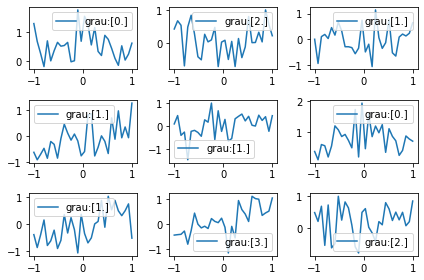

In [81]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

#gera o data set com as funções t^0; t^1; t^2; t^3
N_class=4
s_p=30                                                                           #quantos pontos os dados de entrada tem
s_d=N_class*10                                                                   #quantos exemplos tem meu Dtrain
s_t=N_class*4                                                                    #quantos exemplos para teste
p_r = 0.5                                                                        #porcentagem de ruido 
t=np.linspace(-1,1,s_p)                                                          #define a escala de tempo

#dados de treinamento e teste
xtudo = np.empty((0,s_p),float)                                                  #inicializa as entradas
ytudo = np.empty((0,1),float)
for q_pol in range(0,N_class):
  matriz_polinomios=(1-p_r)*(np.ones([s_d+s_t,1])*t**q_pol)                      #cria os vetores
  matriz_pol_com_ruido=matriz_polinomios+p_r*np.random.normal(0,1,[s_d+s_t,s_p])
  xtudo = np.append(xtudo, matriz_pol_com_ruido, axis=0)
  matriz_graus = np.ones([s_d+s_t,1])*q_pol
  ytudo = np.append(ytudo, matriz_graus,axis=0)
tudo = np.append(xtudo, ytudo, axis=1)
tudo_misturado=tf.random.shuffle(tudo, seed=None, name=None)
lista_tudo_misturado=np.split(tudo_misturado, [s_p,s_p+1], axis=1)
xdata=lista_tudo_misturado[0]
ydata=lista_tudo_misturado[1]
print(xtudo.shape)

#mostra alguns dados
plt.figure()
for nn in range (0,9):
  plt.subplot(3,3,nn+1)
  plt.plot(t,xdata[nn,:])
  plt.legend(['grau:'+str(ydata[nn])])
plt.tight_layout()

#salva o dataset
with h5py.File('poli_data_set.h5','w') as hf:
   hf.create_dataset("tempo", data=t)
   hf.create_dataset("xdata", data=xdata)
   hf.create_dataset("ydata", data=ydata)
   hf.create_dataset("data_info", data=[s_p,s_d,s_t,N_class])

dados do arquivo: ['data_info', 'tempo', 'xdata', 'ydata']
Model: "Rede_MultiClasse"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 12)                372       
                                                                 
 dense_105 (Dense)           (None, 4)                 52        
                                                                 
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________
None
shape xtrain= (30, 30)
shape ytrain= (30, 1)


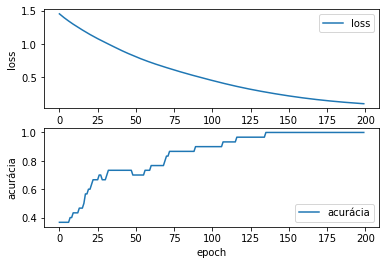

1/1 - 0s - loss: 1.2671 - accuracy: 0.5000 - 130ms/epoch - 130ms/step
Accuracy: 50.00
[[5.6832701e-01 5.0535081e-03 3.6310601e-01 6.3513488e-02]
 [2.4544522e-03 9.7066957e-01 2.0418178e-02 6.4577335e-03]
 [5.1215774e-04 4.7252986e-01 2.0986754e-03 5.2485931e-01]
 [1.4997632e-02 6.6965646e-01 1.1881107e-01 1.9653487e-01]
 [3.8187820e-02 1.7059153e-01 3.8246244e-02 7.5297433e-01]
 [7.4762005e-01 2.5246679e-03 2.2446637e-01 2.5388887e-02]
 [2.0857078e-01 2.7369910e-03 5.9983456e-01 1.8885770e-01]
 [6.5390747e-03 5.5574131e-01 7.6434547e-03 4.3007618e-01]
 [1.3235000e-01 2.2098411e-02 1.7734706e-01 6.6820455e-01]
 [2.2970541e-01 2.4320286e-02 4.3347359e-01 3.1250072e-01]]
data e predição = 
 [[2. 0.]
 [3. 1.]
 [1. 3.]
 [3. 1.]
 [3. 3.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [2. 3.]
 [2. 2.]]


In [82]:
#Código para a classificação do multi-classe
#Importanto o dataset
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py

#carrega o dataset de "poli_data_set.h5"
with h5py.File('poli_data_set.h5', 'r') as hf:
  print('dados do arquivo:',list(hf.keys()))
  [s_p, s_d, s_t, N_classe]=hf["data_info"][:]
  y=hf['ydata'][:]
  x=hf['xdata'][:]

xlista=np.split(x,[s_p, s_d, s_t], axis=0)
ylista=np.split(y,[s_p, s_d, s_t], axis=0)    

xtrain=xlista[0];xtest=xlista[1]
ytrain=ylista[0];ytest=ylista[1]

#Construção da rede neural
model=tf.keras.Sequential([
      tf.keras.layers.Dense(12, input_dim=s_p, activation='relu'),
      tf.keras.layers.Dense(N_class, activation='softmax')],name='Rede_MultiClasse') 

#Compilação da rede neural
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

#Treinamento da rede neural com o data set
print('shape xtrain=', np.shape(xtrain)); 
print('shape ytrain=', np.shape(ytrain));
history=model.fit(xtrain, ytrain, epochs=200,verbose=0)

#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()

#Exibição da Acuracia
_,test_accuracy=model.evaluate(xtest, ytest, verbose=2)
print('Accuracy: %.2f' % (test_accuracy*100))

#Previsões por meio da rede treinada
ypred_prob=model.predict(xtest)
ypred=np.argmax(ypred_prob,axis=1)
print(ypred_prob)

#Apresentação dos resultados
print('data e predição = \n', np.concatenate((ytest, ypred [None].T), axis=1)) 


#calcula a accurácia do teste
#_,accuracy=model.evaluate(xtudo, ytudo)
#print('Accuracy: %.2f'%(accuracy*100))


#mostra os resultados esperados e os alcançados lado a lado
#print('data pred=', np.concatenate((ytudo, np.around(y_pred)), axis=1))
#faz o gráfico do erro de previsão
#plt.figure()
#plt.plot(ytudo-np.around(y_pred))
#plt.title('erro de previsão: $y-y-{previsto}$')
#plt.show()